In [1]:
# project: p6
# submitter: mhashemineja
# partner: none
# hours: 3

In [2]:
#q1
import geopandas

json_file = open("counties.geojson", "r")
df = geopandas.read_file(json_file)
N = len(df)
N

72

<AxesSubplot:>

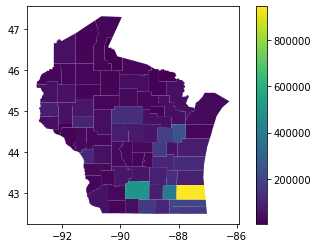

In [3]:
#q2
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
df.plot(column="POP100", ax=ax, legend=True)

In [4]:
import sqlite3
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

con = sqlite3.connect('counties_tracts.db')
df_2 = pd.read_sql("""SELECT NAME, AREALAND FROM counties""", con)
df["AREALAND"] = df_2["AREALAND"]
train, test = train_test_split(df, random_state=320)

In [5]:
#q3
ans = test["NAME"].values.tolist()
ans

['Kewaunee County',
 'Calumet County',
 'Adams County',
 'Eau Claire County',
 'Milwaukee County',
 'Ashland County',
 'Wood County',
 'Dodge County',
 'Sauk County',
 'Clark County',
 'Pepin County',
 'Taylor County',
 'Iron County',
 'Outagamie County',
 'Florence County',
 'Oneida County',
 'Pierce County',
 'Grant County']

In [6]:
#q4
from sklearn.linear_model import LinearRegression
import numpy as np
Xcols = ["AREALAND"]
ycols = ["POP100"]

model = LinearRegression().fit(train[Xcols], train[ycols])
model.score(test[Xcols], test[ycols])

0.022002661530554857

In [7]:
#q5

ans = model.predict(pd.DataFrame({"AREALAND" : [500*2590000]}))
ans[0][0]

82032.53073541154

In [8]:
df_houses = pd.read_sql("""SELECT sum(HU100) as HU100, counties.name FROM tracts left JOIN counties on tracts.county = counties.county group by tracts.county""", con)
df["HU100"] = 0
for j in range(len(df)):
    for i in range(len(df_houses)):
        if df["NAME"][j] == df_houses["NAME"][i]:
            df["HU100"][j] = df_houses["HU100"][i]
train, test = train_test_split(df, random_state=320)

/tmp/ipykernel_83833/3648290405.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HU100"][j] = df_houses["HU100"][i]


In [9]:
#q6
ans = {}
for i in train.values:
    ans[i[0]] = i[-1]
ans

{'Walworth County': 51531,
 'Marquette County': 9896,
 'Racine County': 82164,
 'Waupaca County': 25396,
 'Lincoln County': 16784,
 'Washburn County': 12979,
 'Door County': 23966,
 'Waukesha County': 160864,
 'Sheboygan County': 50766,
 'La Crosse County': 48402,
 'Langlade County': 12360,
 'Marathon County': 57734,
 'Jefferson County': 35147,
 'Price County': 11120,
 'Vilas County': 25116,
 'Columbia County': 26137,
 'Ozaukee County': 36267,
 'Fond du Lac County': 43910,
 'Crawford County': 8802,
 'Lafayette County': 7230,
 'Green County': 15856,
 'Marinette County': 30379,
 'Vernon County': 13720,
 'Douglas County': 22825,
 'Rock County': 68422,
 'Iowa County': 10719,
 'Dane County': 216022,
 'Bayfield County': 12999,
 'Polk County': 24248,
 'Trempealeau County': 12619,
 'Brown County': 104371,
 'Washington County': 54695,
 'Chippewa County': 27185,
 'Oconto County': 23537,
 'Richland County': 8868,
 'Portage County': 30054,
 'Sawyer County': 15975,
 'Menominee County': 2253,
 'Barr

In [10]:
#q7
from sklearn.model_selection import cross_val_score

Xcols = ["HU100"]
ycols = ["POP100"]
model = LinearRegression().fit(train[Xcols], train[ycols])
scores = cross_val_score(model,train[Xcols], train[ycols])
scores.mean()

0.9652534544116037

In [11]:
#q8
scores.std()

0.03704265206670459

In [12]:
#q9
"POP100 = 2.39*HU100 + -7910.46"

'POP100 = 2.39*HU100 + -7910.46'

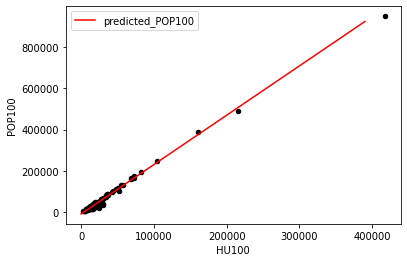

In [13]:
predict_df = pd.DataFrame({"HU100":range(0,400000,10000)})
predict_df["predicted_POP100"] = model.predict(predict_df[Xcols])
ax = predict_df.plot.line(x="HU100",y="predicted_POP100",color="red")
ax = df.plot.scatter(x="HU100",y="POP100", ax = ax, color="black")

[Text(0.5, 0, 'HU100'), Text(0, 0.5, 'POP100')]

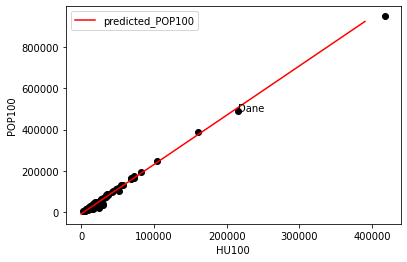

In [14]:
#q10
fig, ax = plt.subplots()
ax.plot(predict_df["HU100"],predict_df["predicted_POP100"],color="red",label="predicted_POP100")
ax.scatter(df["HU100"],df["POP100"], color="black")
ax.text(df["HU100"][59], df["POP100"][59], 'Dane', horizontalalignment='left')
ax.legend(loc="upper left")
ax.set(xlabel="HU100",ylabel="POP100")

In [15]:
#q11
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]])
ans = 0
for col in A:
    for row in col:
        if row >= 2 and row <= 5:
            ans += 1
ans

12

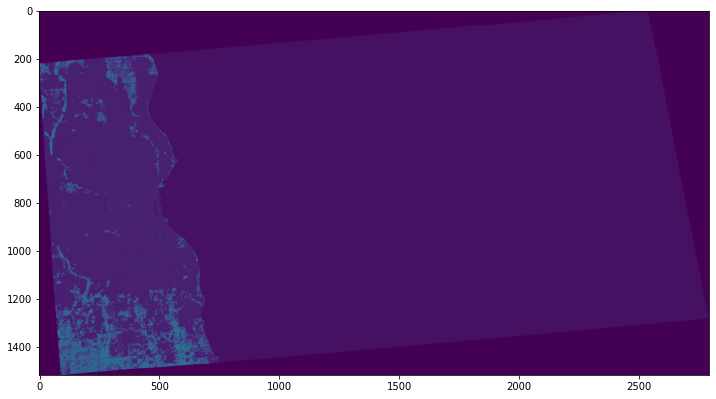

In [16]:
#q12
import rasterio
land = rasterio.open("zip://../p6/land.zip!wi.tif")
import geopandas as gpd
url = "https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/tigerWMS_Census2020/MapServer/82/query?where=NAME%3D%27Milwaukee+County%27&text=&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&distance=&units=esriSRUnit_Foot&relationParam=&outFields=&returnGeometry=true&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=geojson"
milwakee = gpd.read_file(url)
from rasterio.mask import mask
matrix, _ = mask(land, milwakee.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(matrix, vmin=0, vmax=255)

In [17]:
#q13
(matrix == 11).astype(int).sum()/(matrix != 0).astype(int).sum()

0.7963037455950543

In [18]:
land_df = pd.DataFrame()
land_df["NAME"] = df["NAME"]
land_df["POP100"] = df["POP100"]
land_df['developed_open'] = 0
land_df['developed_low'] = 0
land_df['developed_med'] = 0
land_df['developed_high'] = 0
for i in range(len(land_df)):
    matrix, _ = mask(land, df[i:i+1].to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]
    land_df.loc[i, 'developed_open'] = int((matrix == 21).astype(int).sum())
    land_df.loc[i, 'developed_low'] = int((matrix == 22).astype(int).sum())
    land_df.loc[i, 'developed_med'] = int((matrix == 23).astype(int).sum())
    land_df.loc[i, 'developed_high'] = int((matrix == 24).astype(int).sum())
train, test = train_test_split(land_df, random_state=320)

In [19]:
#q14
ans = {}
ans["developed_open"] = {}
ans["developed_low"] = {}
ans["developed_med"] = {}
ans["developed_high"] = {}
ans["POP100"] = {}
for i in range(3):
    ans["developed_open"][train.iloc[i]["NAME"]] = train.iloc[i]["developed_open"]
    ans["developed_low"][train.iloc[i]["NAME"]] = train.iloc[i]["developed_low"]
    ans["developed_med"][train.iloc[i]["NAME"]] = train.iloc[i]["developed_med"]
    ans["developed_high"][train.iloc[i]["NAME"]] = train.iloc[i]["developed_high"]
    ans["POP100"][train.iloc[i]["NAME"]] = train.iloc[i]["POP100"]
ans

{'developed_open': {'Walworth County': 91733,
  'Marquette County': 43703,
  'Racine County': 54221},
 'developed_low': {'Walworth County': 86417,
  'Marquette County': 27193,
  'Racine County': 83597},
 'developed_med': {'Walworth County': 25760,
  'Marquette County': 4541,
  'Racine County': 59855},
 'developed_high': {'Walworth County': 8235,
  'Marquette County': 665,
  'Racine County': 23884},
 'POP100': {'Walworth County': 102228,
  'Marquette County': 15404,
  'Racine County': 195408}}

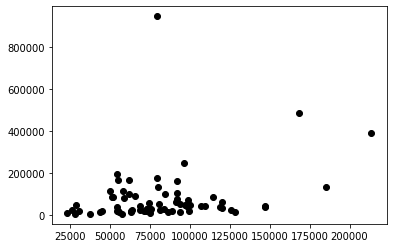

In [20]:
#q15
fig, ax = plt.subplots()
ax.scatter(land_df["developed_open"],land_df["POP100"], color="black")

In [21]:

train
train_polynomial = train[["developed_open","developed_low","developed_med","developed_high"]].copy()
train_polynomial["developed_open ^ 2"] = train_polynomial["developed_open"]**2
train_polynomial["developed_low ^ 2"] = train_polynomial["developed_low"]**2
train_polynomial["developed_med ^ 2"] = train_polynomial["developed_med"]**2
train_polynomial["developed_high ^ 2"] = train_polynomial["developed_high"]**2
train_polynomial.head()

,developed_open,developed_low,developed_med,developed_high,developed_open ^ 2,developed_low ^ 2,developed_med ^ 2,developed_high ^ 2
23,91733,86417,25760,8235,8414943289,7467897889,663577600,67815225
42,43703,27193,4541,665,1909952209,739459249,20620681,442225
0,54221,83597,59855,23884,2939916841,6988458409,3582621025,570445456
34,93845,42934,14371,4570,8806884025,1843328356,206525641,20884900
60,75773,27094,7706,2382,5741547529,734084836,59382436,5673924


In [22]:
# #q16
# from sklearn.preprocessing import PolynomialFeatures
# pf = PolynomialFeatures(degree=2, include_bias=False)
# pf.fit_transform(train[["developed_open","developed_low","developed_med","developed_high"]])